# Unsupervised learning homework

We will use the same data as the supervised homework. Below are the same specifications of the data.

* Imagine that you work at the loan department in a company. At some point, the company receives too many loan applications to consider by eyes. You propose a new idea to help screen those applications - which ones should be further considered by your boss.  
* The **dataset** you have at hands are the applicants' profiles of those whose loan applications were previously accepted.
* Of course, not all of them are good borrowers. You can inspect their loan's current status in the column named `loan_status`. If it says `Fully Paid`, it means that they have fully paid their loan (both principal and interest). On the other hand, when the value in this column says `Charged off`, it means that they haven't paid their instalments in due time for a long period of time, becoming defaulters; those who the company doesn't want.
* Below is the breif description of each column (source: https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction).

Column name | Description
------------|------------
loan_amnt   | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term        | The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate    | Interest Rate on the loan
installment | The monthly payment owed by the borrower if the loan originates.
grade       | LC assigned loan grade
sub_grade   | LC assigned loan subgrade
emp_title   | The job title supplied by the Borrower when applying for the loan
emp_length  | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc | The self-reported annual income provided by the borrower during registration.
verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d    | The month which the loan was funded
loan_status | Current status of the loan
purpose    | A category provided by the borrower for the loan request
title | The loan title provided by the borrower
zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application
addr_state | The state provided by the borrower in the loan application
dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line | The month the borrower's earliest reported credit line was opened
open_acc | The number of open credit lines in the borrower's credit file.
pub_rec | Number of derogatory public records
revol_bal | Total credit revolving balance
revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc | The total number of credit lines currently in the borrower's credit file
initial_list_status | The initial listing status of the loan. Possible values are – W, F
application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc | Number of mortgage accounts.
pub_rec_bankruptcies | Number of public record bankruptcies

In [ ]:
# download datasets from github and unzip (google colab)
!wget https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv

--2022-04-16 14:11:44--  https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/exam/supervised-unsupervised/lending_club_loan_two.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100353395 (96M) [text/plain]
Saving to: ‘lending_club_loan_two.csv’

lending_club_loan_t 100%[===================>]  95.70M   276MB/s    in 0.3s    

2022-04-16 14:11:47 (276 MB/s) - ‘lending_club_loan_two.csv’ saved [100353395/100353395]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import chi2_contingency,pearsonr
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score,homogeneity_completeness_v_measure
from sklearn.cluster import DBSCAN,KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE
from tqdm import tqdm

In [ ]:
# Read the data
df = pd.read_csv('lending_club_loan_two.csv')#.sample(n = 20000, random_state = 42)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Clustering

In this homework we will try to extract insights using unsupervised clustering methods.

Drop the following columns from the dataset
- issue_d
- earliest_cr_line

Drop the following column from the dataset and set it as the true labels
- loan_status

<font color='purple'> Q0: Drop other features that you think will be irrelavent in your analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
# Some column has a lot of unique category values which aren't good features for ML model
for col in df.columns:
  if df[col].dtype =='object':
    print(f'{col} = {df[col].nunique()} unique value')

term = 2 unique value
grade = 7 unique value
sub_grade = 35 unique value
emp_title = 173105 unique value
emp_length = 11 unique value
home_ownership = 6 unique value
verification_status = 3 unique value
issue_d = 115 unique value
loan_status = 2 unique value
purpose = 14 unique value
title = 48817 unique value
earliest_cr_line = 684 unique value
initial_list_status = 2 unique value
application_type = 3 unique value
address = 393700 unique value


In [ ]:
df.drop(columns = ['earliest_cr_line','issue_d','address','title','emp_title','grade'],inplace = True)

In [ ]:
for col in df.columns:
  if df[col].dtype =='object':
    print(f'{col} = {df[col].nunique()} unique value')

term = 2 unique value
sub_grade = 35 unique value
emp_length = 11 unique value
home_ownership = 6 unique value
verification_status = 3 unique value
loan_status = 2 unique value
purpose = 14 unique value
initial_list_status = 2 unique value
application_type = 3 unique value


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340775 entries, 0 to 396028
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             340775 non-null  float64
 1   term                  340775 non-null  object 
 2   int_rate              340775 non-null  float64
 3   installment           340775 non-null  float64
 4   sub_grade             340775 non-null  object 
 5   emp_length            340775 non-null  object 
 6   home_ownership        340775 non-null  object 
 7   annual_inc            340775 non-null  float64
 8   verification_status   340775 non-null  object 
 9   loan_status           340775 non-null  object 
 10  purpose               340775 non-null  object 
 11  dti                   340775 non-null  float64
 12  open_acc              340775 non-null  float64
 13  pub_rec               340775 non-null  float64
 14  revol_bal             340775 non-null  float64
 15  

In [ ]:
## Some columns can be converted to numerical value, such as grade and emp_length.
df['term'] = df['term'].str[:3]
df['term'] = df.term.astype(int)

emplength_list = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
conv_emplength = {emplength_list[i]:i for i in range(len(emplength_list))}

subgrade_list = [g+n for g in 'ABCDEFG' for n in '12345']
conv_subgrade = {subgrade_list[i]:i for i in range(len(subgrade_list))}

df['sub_grade'] = df['sub_grade'].apply(conv_subgrade.get)
df['emp_length'] = df['emp_length'].apply(conv_emplength.get)

dummies_df = pd.get_dummies(df,columns=['initial_list_status','term','verification_status','home_ownership','purpose','application_type'])

In [ ]:
## Since, There are a lot of samples, and we want mostly insights.
## We can downsample the data and make it more balanced.

In [ ]:
idx_fully = dummies_df[dummies_df['loan_status']=='Fully Paid'].index.tolist()
idx_charge = dummies_df[dummies_df['loan_status']=='Charged Off'].index.tolist()
sample_idx_fully = random.sample(idx_fully,5000)
sample_idx_charge = random.sample(idx_charge,5000)

dummies_df = dummies_df.loc[sample_idx_charge+sample_idx_fully]

In [ ]:
dummies_df

,loan_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
246032,14825.0,21.15,559.68,21,2,137000.0,Charged Off,26.12,14.0,0.0,...,0,0,0,0,0,0,1,0,1,0
66441,32000.0,23.50,911.32,25,10,73000.0,Charged Off,18.85,16.0,0.0,...,0,0,0,0,0,0,0,0,1,0
330481,10000.0,8.90,317.54,4,6,150000.0,Charged Off,2.07,12.0,0.0,...,0,0,0,0,0,0,0,0,1,0
99304,1800.0,13.33,60.94,12,0,18000.0,Charged Off,28.60,6.0,0.0,...,0,0,0,0,0,0,0,0,1,0
207787,32000.0,12.88,1076.36,11,10,80500.0,Charged Off,27.09,23.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200982,15000.0,10.99,491.01,6,2,70000.0,Fully Paid,1.12,7.0,0.0,...,0,0,0,0,0,0,0,0,1,0
315193,17625.0,13.35,596.84,11,9,49000.0,Fully Paid,22.31,16.0,0.0,...,0,0,0,0,0,0,0,0,1,0
122566,8400.0,11.99,278.97,7,3,83000.0,Fully Paid,14.23,13.0,1.0,...,0,0,0,0,0,0,0,0,1,0
327820,19200.0,19.72,710.81,19,0,200000.0,Fully Paid,11.87,12.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
labels = dummies_df['loan_status']
labels_num = [0 if x =='Fully Paid' else 1 for x in labels]
df_train = dummies_df.drop(columns = ['loan_status'])

In [ ]:
df_train

,loan_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
246032,14825.0,21.15,559.68,21,2,137000.0,26.12,14.0,0.0,56296.0,...,0,0,0,0,0,0,1,0,1,0
66441,32000.0,23.50,911.32,25,10,73000.0,18.85,16.0,0.0,24565.0,...,0,0,0,0,0,0,0,0,1,0
330481,10000.0,8.90,317.54,4,6,150000.0,2.07,12.0,0.0,4538.0,...,0,0,0,0,0,0,0,0,1,0
99304,1800.0,13.33,60.94,12,0,18000.0,28.60,6.0,0.0,5817.0,...,0,0,0,0,0,0,0,0,1,0
207787,32000.0,12.88,1076.36,11,10,80500.0,27.09,23.0,0.0,23722.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200982,15000.0,10.99,491.01,6,2,70000.0,1.12,7.0,0.0,1825.0,...,0,0,0,0,0,0,0,0,1,0
315193,17625.0,13.35,596.84,11,9,49000.0,22.31,16.0,0.0,8356.0,...,0,0,0,0,0,0,0,0,1,0
122566,8400.0,11.99,278.97,7,3,83000.0,14.23,13.0,1.0,8249.0,...,0,0,0,0,0,0,0,0,1,0
327820,19200.0,19.72,710.81,19,0,200000.0,11.87,12.0,0.0,44805.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
## normalized data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train.to_numpy())
X_train.shape

(10000, 44)

<font color='purple'> Q1: Think about what would you like to explore from this data

In [ ]:
## Let's try to see what's the difference between fully paid and charged off
## accounts and whether there are different sub-clusters or characteristics betweeen
## the two.

## Our main question might be are there any characteristics that make someone
## more likely to be fully paid or charged off? We'll try to identify clusters
## that are quite distinguishable and look into them.

In [ ]:
## But before we go any further
## let's explore about correlation coefficient between loan_status and other features
## to dig into if we will remove any feature.

## Correlation is a well-known similarity measures between two features. If two features are linearly dependent, then their correlation coefficient is ±1.
## If the features are uncorrelated, the correlation coefficient is 0.

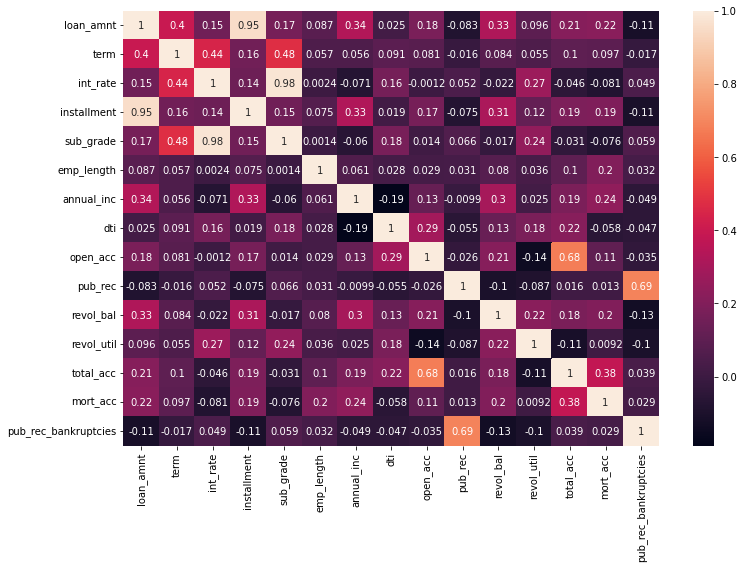

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

## check correlation between loan_status and others feature  
*  One can use Chi-square test to measure correlation cofficent of 2 categorical columns
* read further : https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/


In [ ]:
for col in df.select_dtypes("object").columns:
  if col =='loan_status':
    continue
  print(f'columns = {col}')
  CrosstabResult=pd.crosstab(index=df['loan_status'],columns=df[col])
  display(CrosstabResult)
  ChiSqResult = chi2_contingency(CrosstabResult)

  # H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.
  # P-Value is the Probability of H0 being True

  # If P-Value < 0.05 then the assumption(H0) is statistically significant
  # If the p-value is below your threshold of significance (typically p < 0.05),
  # you can reject the null hypothesis, but this does not mean that there is a 95% probability that the alternative hypothesis is true.
  p_val = ChiSqResult[1]
  print(f'The P-Value of the ChiSq Test is: {p_val}')
  if p_val <= 0.05:
    print('statistically significant')
  else:
    print('not significant')
  print('\n\n')

columns = home_ownership


home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,29453,6,7,6458,31344
Fully Paid,3,143982,22,24,25116,104360


The P-Value of the ChiSq Test is: 0.0
statistically significant



columns = verification_status


verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,16060,25837,25371
Fully Paid,92203,91961,89343


The P-Value of the ChiSq Test is: 0.0
statistically significant



columns = purpose


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,439,12263,43042,0,3431,362,1153,720,540,3580,55,1173,376,134
Fully Paid,2683,61424,163753,1,16591,1385,5325,2569,1667,12866,175,2656,1605,807


The P-Value of the ChiSq Test is: 1.1638839924840086e-238
statistically significant



columns = initial_list_status


initial_list_status,f,w
loan_status,,
Charged Off,37683,29585
Fully Paid,152749,120758


The P-Value of the ChiSq Test is: 0.4263447549264744
not significant



columns = application_type


application_type,DIRECT_PAY,INDIVIDUAL,JOINT
loan_status,,,
Charged Off,90,67138,40
Fully Paid,171,273000,336


The P-Value of the ChiSq Test is: 9.026358106803208e-13
statistically significant





In [ ]:
## This mean that all categorical data correlated to loan_status except initial_list_status

## calculate correlation between loan_status and numerical features

In [ ]:
## here
for col in df.select_dtypes("number").columns:
  if col =='loan_status':
    continue
  print(f'columns = {col}')
  x = [0 if x =='Fully Paid' else 1 for x in df['loan_status']]
  y = df[col].tolist()
  corr,_ = pearsonr(x,y)
  print(f'person correlation = {corr}\n')

columns = loan_amnt
person correlation = 0.0621052802141097

columns = term
person correlation = 0.1814753069494759

columns = int_rate
person correlation = 0.2504073262568468

columns = installment
person correlation = 0.04189307621476283

columns = sub_grade
person correlation = 0.26909054960318035

columns = emp_length
person correlation = -0.01967970186275915

columns = annual_inc
person correlation = -0.05222389362221333

columns = dti
person correlation = 0.13221758391126798

columns = open_acc
person correlation = 0.02966156252222557

columns = pub_rec
person correlation = 0.013849150926851996

columns = revol_bal
person correlation = -0.011536541660223507

columns = revol_util
person correlation = 0.07816258808156476

columns = total_acc
person correlation = -0.018717746921724093

columns = mort_acc
person correlation = -0.07227653931657493

columns = pub_rec_bankruptcies
person correlation = 0.002549925325777389



<font color='purple'>Q2: Find the best K for k-means. Explain why you think this is the best result?

<font color='purple'>Q3: Plot the best clustering result



In [ ]:
## We'll try elbow method to pick the number of k
## You can also do it by eye/or look at other scores/ or class distribution.

In [ ]:
def plot_elbow_method(num,X):
  scores = []
  for k in tqdm(range(2,num+1)):
    clustering = KMeans(n_clusters=k, random_state=42).fit(X)
    score = clustering.inertia_
    scores.append(score)
  #plt.title(title)
  plt.plot(np.arange(2,num+1),scores)
  plt.xlabel('number of k ')
  plt.ylabel('inertia score')

100%|██████████| 49/49 [02:37<00:00,  3.22s/it]


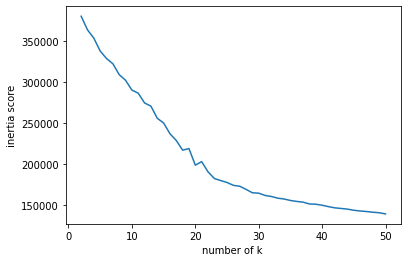

In [ ]:
plot_elbow_method(50,X_train)

In [ ]:
# From the graph, it looks like the elbow is around ~28

In [ ]:
def show_cluster(X_train,pca,clusters):
  #pca = PCA(n_components=2,random_state = 78).fit_transform(X_train)
  for i in np.unique(clusters):
    plt.scatter(pca[clusters == i ,0] , pca[clusters ==i , 1 ] , label = i ,s = 3)
  plt.legend()

In [ ]:
best_k = 28
kmean = KMeans(n_clusters=best_k, random_state=101).fit(X_train)
clusters = kmean.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


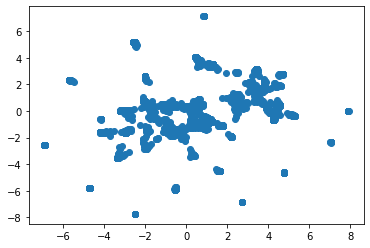

In [ ]:
pca = TSNE(n_components=2,random_state = 78,n_jobs = -1,perplexity = 20 ,n_iter = 250).fit_transform(X_train)
plt.scatter(pca[:,0],pca[:,1])

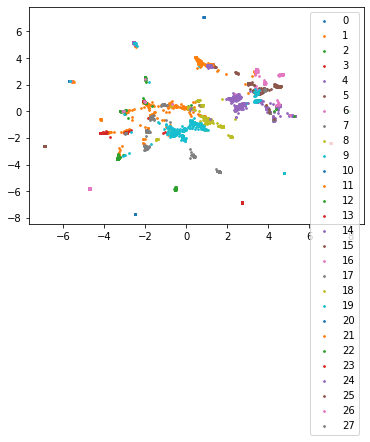

In [ ]:
for i in np.unique(clusters):
  plt.scatter(pca[clusters == i ,0] , pca[clusters ==i , 1 ] , label = i ,s = 3)
plt.legend()

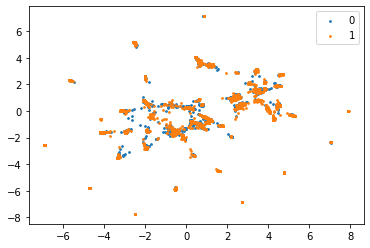

In [ ]:
## True label
for i in np.unique(labels_num):
  plt.scatter(pca[labels_num == i ,0] , pca[labels_num ==i , 1 ] , label = i ,s = 3)
plt.legend()

In [ ]:
# Some cluster contains a mixture of both customer types.
# cluster 1 seems to all over the place.
# cluster 3 seems to be mostly charged off.
# So we can additionally dig into 3 if we want to learn more about patterns for these people.

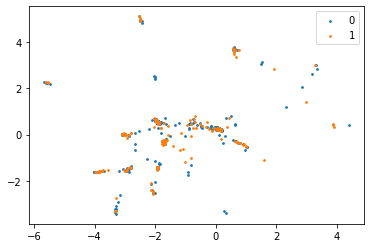

In [ ]:
## True label with only cluster 1
for i in np.unique(labels_num):
  plt.scatter(pca[np.logical_and(labels_num == i,clusters == 1),0] , pca[np.logical_and(labels_num == i,clusters == 1), 1 ] , label = i ,s = 3)
plt.legend()

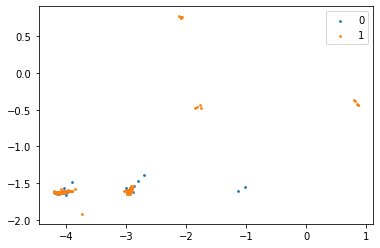

In [ ]:
## True label with only cluster 3
for i in np.unique(labels_num):
  plt.scatter(pca[np.logical_and(labels_num == i,clusters == 3),0] , pca[np.logical_and(labels_num == i,clusters == 3),1], label = i ,s = 3)
plt.legend()

In [ ]:
# These are the summary stats of cluster 3 which we can look into further
df_train[clusters == 3].describe()

,loan_amnt,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.0,411.0,411.0,411.0,411.0,411.0,411.0,411.0,411.0,411.0
mean,12762.591241,15.092749,442.829976,12.929440,5.486618,56599.372871,21.647786,11.238443,0.036496,12863.291971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,6877.813919,3.581200,240.092881,5.445731,3.613888,29923.843802,8.650496,5.121602,0.212147,8857.884551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1000.000000,6.030000,34.410000,0.000000,0.000000,11000.000000,1.010000,3.000000,0.000000,109.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,7800.000000,12.740000,268.450000,9.000000,2.000000,36000.000000,15.550000,7.000000,0.000000,6316.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,11000.000000,14.650000,379.280000,13.000000,5.000000,50000.000000,22.460000,10.000000,0.000000,10459.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,17412.500000,17.770000,597.780000,17.000000,10.000000,70000.000000,28.830000,14.000000,0.000000,17972.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,32000.000000,24.990000,1107.510000,28.000000,10.000000,230000.000000,39.790000,30.000000,2.000000,43490.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<font color='purple'>Q4: Now use DBScan for the clustering. Tune the hyperparameters for the best clustering. Explain why you think this is the best result?

<font color='purple'>Q5: Plot the best clustering result

## Without tuning any parameters

In [ ]:
dbscan = DBSCAN().fit(X_train)
clusters = dbscan.labels_

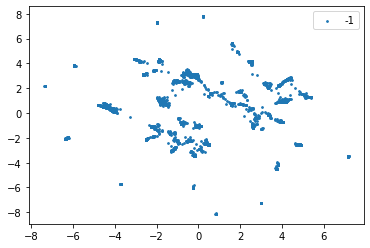

In [ ]:
show_cluster(X_train,pca,clusters)

In [ ]:
#Everything is -1 so DBSCAN fails with default hyperparameters

## Before tuning dbscan , you have to know what the hyperparameters means


*   esp = number of closeness ie. how close the points should be considered them as a cluster
*   min_samples = the minimum number of neighbors a given point should have in order to be classified as a core point.



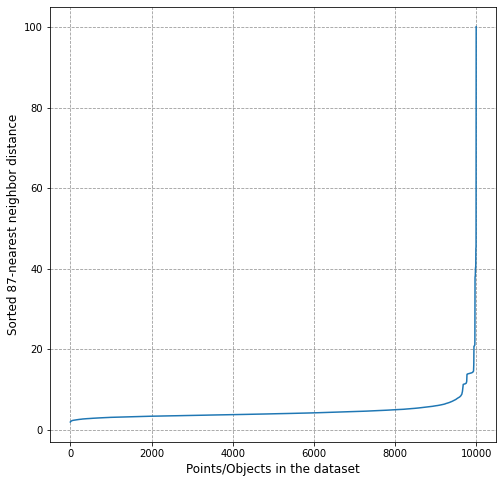

In [ ]:
## ref : https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * X_train.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=X_train, k=k)

## According to folowing link:
https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan
*   Optimal values of esp : around 8

*   min_sampels = 2*number of feature  : around 100



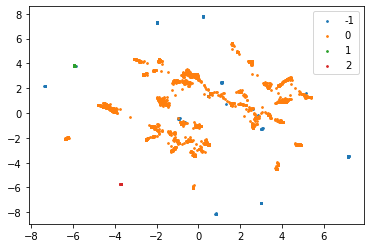

In [ ]:
dbscan = DBSCAN(eps = 8,min_samples = 100).fit(X_train)#,metric = 'cosine'
clusters = dbscan.labels_
show_cluster(X_train,pca,clusters)

<font color='purple'>Q6: One way to see if the clustering is good or not is to check if it separates something we care about well. Let the true label be loan_status. Evaluate the best model of each algorithm using homogeneity, completeness, and v-measure.


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html#sklearn.metrics.homogeneity_completeness_v_measure

In [ ]:
db_labels = DBSCAN(eps = 12,min_samples = 100).fit_predict(X_train)
kmean_labels = KMeans(n_clusters=28, random_state=101).fit_predict(X_train)

In [ ]:
kmean_labels

array([26,  9,  4, ..., 24, 20, 24], dtype=int32)

In [ ]:
print(f'kmean : homogeneity_completeness_v_measure = {homogeneity_completeness_v_measure(labels,kmean_labels)}')
print(f'dbscan : homogeneity_completeness_v_measure = {homogeneity_completeness_v_measure(labels,db_labels)}')

kmean : homogeneity_completeness_v_measure = (0.045666259385351474, 0.011477356524243495, 0.018344234320889493)
dbscan : homogeneity_completeness_v_measure = (9.570705350094826e-05, 0.000620802768844479, 0.0001658461669564984)


In [ ]:
# From the scores, k-mean seems to be the better choice here. However, the value is still not so high.
# We can try evaluating other k values or try clustering only the charged-off or fully paid data for other kinds of insights.
